Tutorial for wrangling and analyzing data

Intro: 
Have you ever wondered if you can predict the stock market? If you can predict the future, even? Of course, nobody knows for sure, and this tutorial is NOT meant for someone to perfectly predict when the stock market will increase, or decrease. However, by learning how to properly wrangle and analyze data, somebody can make an investment decision with a better understanding of these things. This tutorial is meant to teach people to properly wrnagle and orgaznie data in a way that they can glean information from it, allowing them to make educated decisions.

Step 1:
Choose your dataset. This can be a dataset of anything you're interested in learning more about. For this tutorial, we will be working with this dataset of stock market prices by day and month, and analyzing its seasonality. 


Read your dataset into the code with this:


In [14]:
import pandas as pd
df = pd.read_csv("C:\\Users\\Isaac\\OneDrive\\Documents\\fall 2025 semester\\STAT 386\\HistoricalData_1758833379259.csv")

Great! Now that you've got it read in, you can start playing with it.

In [15]:
print(df.head())

        Date  Close/Last      Open      High       Low
0  9/24/2025    22497.85  22656.02  22657.45  22397.00
1  9/23/2025    22573.47  22782.72  22785.13  22539.04
2  9/22/2025    22788.98  22606.59  22801.90  22590.86
3  9/19/2025    22631.48  22554.32  22645.11  22497.71
4  9/18/2025    22470.73  22439.11  22540.93  22358.49


allows you to see the first few rows of the dataset.

Step 2:
Wrnagle and clean the data. The dataset will inevitably have certtian things that you don't care about, or that you don't want to sue. You will have to remove certain rows and columns from the data, as well as certain parts that might have N/A or empty values in them. You will also have to perform some transformations. For this dataset, we will have to figure out what the days of the week are for each date in the dataset

In [16]:
df_last_year = df.iloc[:365]

This command, .iloc[], made it so the dataset is now only the top 365 rows, so that now we only have the last year in our dataset, and the rest is trimmed out. Now we must figure out how to change the date values into the names of days of the week.

In [17]:
df_last_year["Date"] = pd.to_datetime(df_last_year["Date"])
print(df_last_year.head())

        Date  Close/Last      Open      High       Low
0 2025-09-24    22497.85  22656.02  22657.45  22397.00
1 2025-09-23    22573.47  22782.72  22785.13  22539.04
2 2025-09-22    22788.98  22606.59  22801.90  22590.86
3 2025-09-19    22631.48  22554.32  22645.11  22497.71
4 2025-09-18    22470.73  22439.11  22540.93  22358.49


This code makes sure that it in the dataset, the dates are recognized as acutal days, not as just some weird numbers.
Now we will create a column in which the names of the days are listed, as in days of the week. For the sake of organization, I will move the column of day names to the left side.

In [18]:
df_last_year["Day of Week"] = df_last_year["Date"].dt.day_name()
df_last_year.insert(0, "Day of week", df_last_year["Day of Week"])
df_last_year = df_last_year.drop(df_last_year.columns[6], axis=1) 

Now let's check that we did your code correctly:

In [19]:
print(df_last_year.head())

  Day of week       Date  Close/Last      Open      High       Low
0   Wednesday 2025-09-24    22497.85  22656.02  22657.45  22397.00
1     Tuesday 2025-09-23    22573.47  22782.72  22785.13  22539.04
2      Monday 2025-09-22    22788.98  22606.59  22801.90  22590.86
3      Friday 2025-09-19    22631.48  22554.32  22645.11  22497.71
4    Thursday 2025-09-18    22470.73  22439.11  22540.93  22358.49


I had accidentally removed the "Low" column, but luckily that wasn't a column we needed. I also removed the column that added the day of the week name on the end, so that we only have one column with the day names.

Now we will further filter the dataset to prepare to create a table, showing the average value of the NASDAQ for each day ofht eweek. For this I will want to remove the "Date", "Open", and "High" columns as we will use "Close/Last" as the value to measure a day's sotck value by.

In [20]:
df_last_year = df_last_year.drop(['Date', 'Open', 'High', 'Low'], axis=1) 

And let's check again that those columns were removed properly:

In [21]:
print(df_last_year.head())

  Day of week  Close/Last
0   Wednesday    22497.85
1     Tuesday    22573.47
2      Monday    22788.98
3      Friday    22631.48
4    Thursday    22470.73


PErfect!

Now I want to make the table. I will do this by using the groupby function in python to group all of the days together. I will then create a column of the average value for each day.

In [25]:
df_day_avg = df_last_year.groupby('Day of week')['Close/Last'].mean().reset_index()

In [26]:
print(df_day_avg)

  Day of week    Close/Last
0      Friday  19383.032400
1      Monday  19313.610000
2    Thursday  19341.598776
3     Tuesday  19380.594808
4   Wednesday  19416.199216


Now it's time to make that graphic! Fir this data, a bar chart makes the most sense. Here we'll create a bar chart showing the five days of the week that the stock market is open, and the average closing price at each of those days. Let's also reorganize the order of the days so that it's Monday - Friday.

<Axes: title={'center': 'NASDAQ average by Day of Week'}, xlabel='Day of week'>

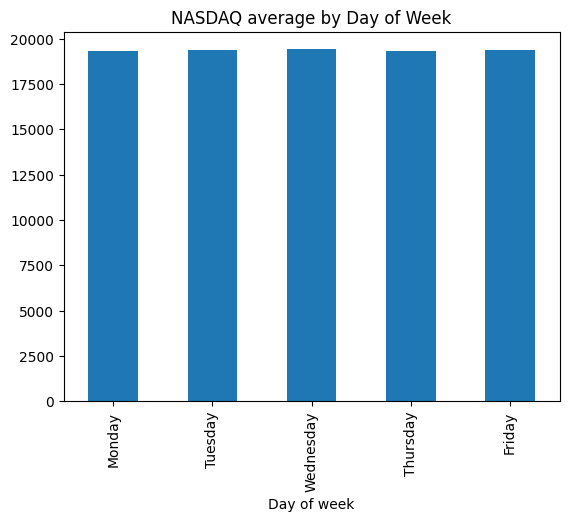

In [30]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
df_day_avg["Day of week"] = pd.Categorical(df_day_avg["Day of week"], categories=order, ordered=True)
df_day_avg = df_day_avg.sort_values("Day of week")
df_day_avg.plot(kind="bar", x="Day of week", y="Close/Last", legend=False, title="NASDAQ average by Day of Week")

Here's the graph, with the days in order from left to right. While there is a difference, it is so small compared to this scale that it is hard to see any differences at all. Let's scale the bar chart differently so that we can see the differences more easily:

<Axes: title={'center': 'NASDAQ average by Day of Week'}, xlabel='Day of week'>

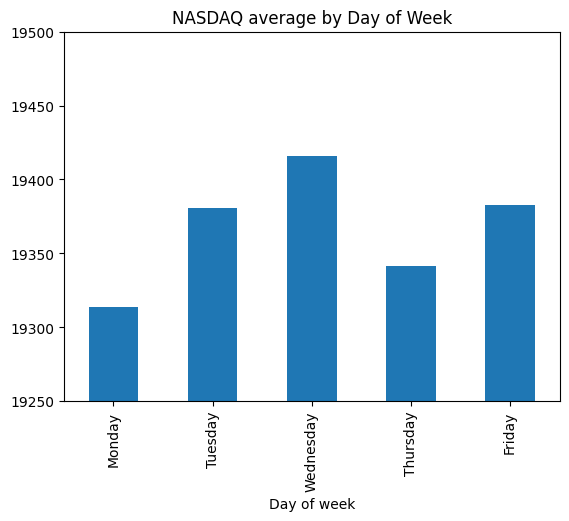

In [31]:
day_plot = df_day_avg.plot(kind="bar", x="Day of week", y="Close/Last", legend=False, title="NASDAQ average by Day of Week")
day_plot.set_ylim(19250, 19500)
day_plot

Here, we can see it scaled differently from 19250 to 19500, and at this scale we can see that certian days of the week have higher average values than others, over the last two years. Though the difference is overall still pretty small, we can see there is a difference, and it looks like it is highest on Wednesdays, while lowest on Mondays.